Import dependencies

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pygimli as pg
from pygimli.physics import ert
from pygimli.frameworks import PriorModelling, JointModelling
from pygimli.viewer.mpl import draw1DColumn

Load ERT Data (Res2Dinv converted from FlashResZZ)

In [9]:
data = ert.load('Guapota_Res.dat')
print(data)

19/08/23 - 17:10:32 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 32 data: 456, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']


Show pseudosection

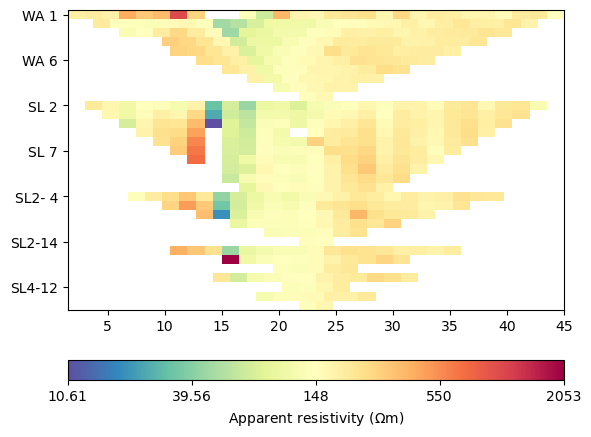

In [10]:
ax, cb = ert.show(data)

Compute geometric factors

In [11]:
data["k"] = ert.geometricFactors(data)
data["err"] = ert.estimateError(data, relativeError=0.02, absoluteUError=50e-6)
mgr = ert.ERTManager(data, verbose=True)
mgr.invert(paraDepth=10, quality=34.6, paraMaxCellSize=100)

19/08/23 - 17:10:32 - pyGIMLi - INFO - Found 2 regions.
19/08/23 - 17:10:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
19/08/23 - 17:10:32 - pyGIMLi - INFO - Found 2 regions.
19/08/23 - 17:10:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
19/08/23 - 17:10:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
19/08/23 - 17:10:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
19/08/23 - 17:10:32 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2498 Cells: 4780 Boundaries: 3692
19/08/23 - 17:10:32 - pyGIMLi - INFO - Use median(data values)=179.74681091500003
19/08/23 - 17:10:32 - pyGIMLi - INFO - Created startmodel from forward operator: 627 [179.74681091500003,...,179.74681091500003]
19/08/23 - 17:10:32 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000185FF9125E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000185FF912720>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000185FF912680>
min/max (data): 10.61/2053
min/max (error): 2%/2.49%
min/max (start model): 180/180
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 209.18 (dPhi = 57.92%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 118.66 (dPhi = 41.82%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 87.62 (dPhi = 24.02%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 83.0 (dPhi = 4.9%) lam: 20.0
-------------------------------------------------------

627 [213.98759238533694,...,157.7992711347143]

Define colormap and plot inversion

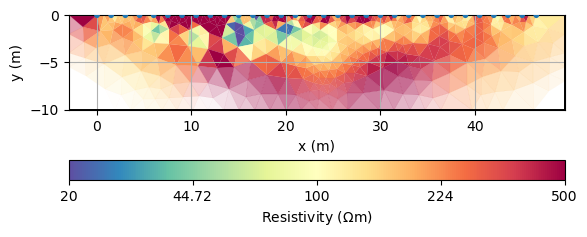

In [12]:
kw = dict(cMin=20, cMax=500, logScale=True, cMap="Spectral_r",
          xlabel="x (m)", ylabel="y (m)")
ax, cb = mgr.showResult(**kw)
ax.grid(True)